Data School [youtube](https://www.youtube.com/watch?v=85dtiMz9tSo) [github](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path = 'data/pima-indians-diabetes.csv'
names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=names)
print(pima.head())

feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
(768, 4) (768,)


$$
\begin{array}{|c|c|c|c|}\hline
&\mbox{negative}&\mbox{positive}\\\hline
\mbox{NEGATIVE (N)}&\mbox{TN}&\mbox{FP}&\mbox{FPR}=\frac{\mbox{FP}}{\mbox{N}}=\frac{\mbox{FP}}{\mbox{TN} + \mbox{FP}}\\\hline
\mbox{POSITIVE (P)}&\mbox{FN}&\mbox{TP}&\mbox{TPR}=\frac{\mbox{TP}}{\mbox{P}}=\frac{\mbox{TP}}{\mbox{FN} + \mbox{TP}}\\\hline
\end{array}
$$

0.6927083333333334
[[118  12]
 [ 47  15]]
(74,) (74,) (74,)


/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


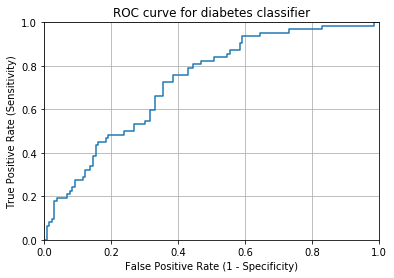

AUC : 0.7245657568238213


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
#print(y_pred_class.shape, y_pred_prob.shape)

print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

# y_pred_class_ = np.array(y_pred_prob >= 0.45).astype(np.int64) 
# print(metrics.accuracy_score(y_test, y_pred_class_))
# print(metrics.confusion_matrix(y_test, y_pred_class_))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
print(fpr.shape, tpr.shape, thresholds.shape)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("AUC : {}".format(metrics.roc_auc_score(y_test, y_pred_prob)))

In [23]:
idx = np.argmax(np.array(tpr>=0.8).astype(np.int64))
thresholds_ = thresholds[idx]

y_pred_class_ = np.array(y_pred_prob >= thresholds_).astype(np.int64) 
print(metrics.accuracy_score(y_test, y_pred_class_))
print(metrics.confusion_matrix(y_test, y_pred_class_))

0.8064516129032258
0.27954551677191325
0.6354166666666666
[[72 58]
 [12 50]]


0.71875
[[111  19]
 [ 35  27]]


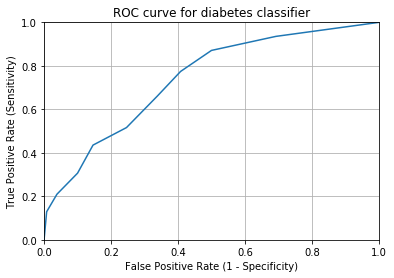

AUC : 0.7377171215880893


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

# y_pred_class_ = np.array(y_pred_prob >= 0.4).astype(np.int64) 
# print(metrics.accuracy_score(y_test, y_pred_class_))
# print(metrics.confusion_matrix(y_test, y_pred_class_))

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("AUC : {}".format(metrics.roc_auc_score(y_test, y_pred_prob)))

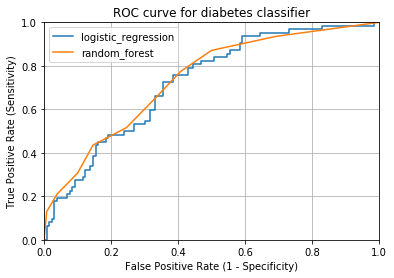

In [5]:
plt.plot(fpr, tpr, label='logistic_regression')
plt.plot(fpr2, tpr2, label='random_forest')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()
plt.show()